In [68]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df_2012_2013 = pd.read_csv('merged/Type/data_2012_2013.csv')

In [70]:
df_311 = df_2012_2013[df_2012_2013.columns.tolist()[:-7]]

In [71]:
df_weather = df_2012_2013[df_2012_2013.columns.tolist()[:5] + df_2012_2013.columns.tolist()[-7:]]

In [72]:
df_weather = df_weather.groupby(['year','month','day','time'], as_index=False).mean()

In [73]:
df_311_newyork = df_311.groupby(['year','month','day','time'], as_index=False).sum()

In [74]:
df_311_newyork_during_sandy = df_311_newyork.loc[df_311_newyork.year == 2012]

In [75]:
df_311_newyork_during_sandy = df_311_newyork_during_sandy.loc[(df_311_newyork_during_sandy.month == 11)|(df_311_newyork_during_sandy.month == 10)]

In [76]:
df_311_newyork_during_sandy = df_311_newyork_during_sandy.iloc[504:792]

In [77]:
df_311_newyork_during_sandy = df_311_newyork_during_sandy.merge(df_weather,
                                                                left_on=['year','month','day','time'],
                                                                right_on=['year','month','day','time'])

In [78]:
df_311_newyork_during_sandy

,year,month,day,time,APPLIANCE,Air Quality,Blocked Driveway,Boilers,Broken Muni Meter,Building/Use,...,Traffic Signal Condition,Vending,Water System,wind_dir,wind_speed,visby,temp,pressure,precip,rhx
0,2012,10,22,0,27,0,2,0,0,0,...,0,0,2,282.5,5.125,16093.0,13.90,1016.975,0.0,52.5
1,2012,10,22,1,0,0,2,0,0,1,...,0,0,1,290.0,6.700,16093.0,13.90,1017.200,0.0,51.0
2,2012,10,22,2,0,0,3,0,0,1,...,1,0,0,290.0,6.700,16046.5,13.60,1017.350,0.0,52.0
3,2012,10,22,3,0,0,2,0,0,0,...,1,0,1,310.0,6.700,16093.0,13.30,1017.500,0.0,53.0
4,2012,10,22,4,0,0,3,0,0,0,...,2,0,0,300.0,6.200,16093.0,12.80,1017.900,0.0,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2012,11,2,19,0,0,5,0,0,2,...,4,0,4,300.0,8.800,16093.0,8.90,1006.400,0.0,51.0
284,2012,11,2,20,0,0,3,0,0,3,...,0,0,4,305.0,8.200,16046.5,8.35,1006.700,0.0,52.0
285,2012,11,2,21,0,0,2,0,0,1,...,5,0,5,300.0,8.800,16093.0,7.20,1007.500,0.0,56.0
286,2012,11,2,22,0,0,3,1,0,0,...,3,0,2,290.0,7.200,16093.0,6.70,1007.900,0.0,60.0


In [80]:
df_311_newyork_ds_wo_time =df_311_newyork_during_sandy.iloc[:,4:]

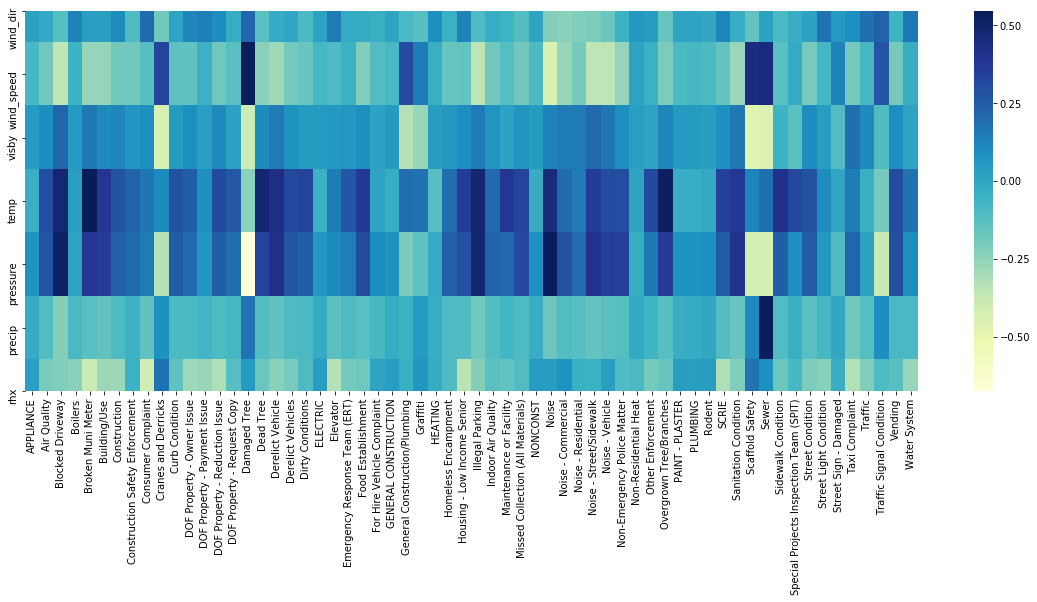

In [91]:
plt.figure(figsize=(20,7))
sns.heatmap(df_311_newyork_ds_wo_time.corr().iloc[-7:,:-7],cmap='YlGnBu')

In [97]:
df_311_newyork_ds_wo_time.corr().loc['Damaged Tree'].iloc[-7:]

wind_dir      0.215255
wind_speed    0.539977
visby        -0.392506
temp         -0.240190
pressure     -0.675239
precip        0.175173
rhx           0.047618
Name: Damaged Tree, dtype: float64

In [98]:
df_311_newyork_ds_wo_time.corr().loc['Blocked Driveway'].iloc[-7:]

wind_dir     -0.113756
wind_speed   -0.354265
visby         0.216116
temp          0.475979
pressure      0.516803
precip       -0.231222
rhx          -0.220782
Name: Blocked Driveway, dtype: float64